### Problem Statement
`The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).`

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [477]:
walmart_data = pd.read_csv('walmart_data.csv')
print('Shape',walmart_data.shape)

Shape (550068, 10)


In [478]:
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [479]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [480]:
walmart_data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

`No null values available`\
`Occupation, City and Product category are masked`

In [481]:
walmart_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [482]:
walmart_data.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [483]:
print("Purchase \nmedian: ", walmart_data.Purchase.median(), '\nmean: ',walmart_data.Purchase.mean())

Purchase 
median:  8047.0 
mean:  9263.968712959126


<AxesSubplot:ylabel='Purchase'>

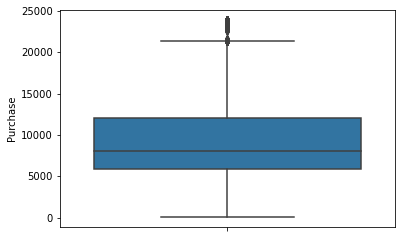

In [484]:
sns.boxplot(y=walmart_data['Purchase'])

`There is not a big jump in mean and median also outliers in box plot looks fine so we can go ahead with this.`

In [485]:
walmart_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [486]:
walmart_data.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [487]:
walmart_data.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

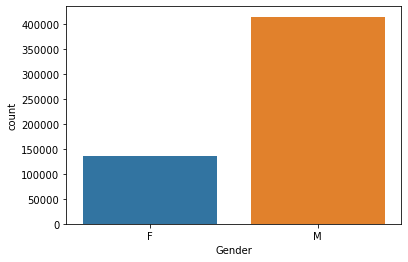

In [488]:
sns.countplot(walmart_data['Gender'])
plt.show()

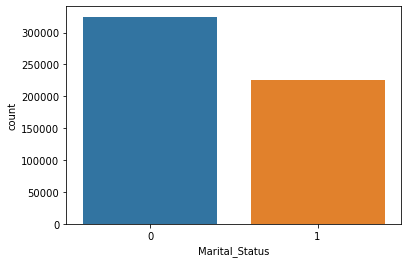

In [489]:
sns.countplot(walmart_data['Marital_Status'])
plt.show()

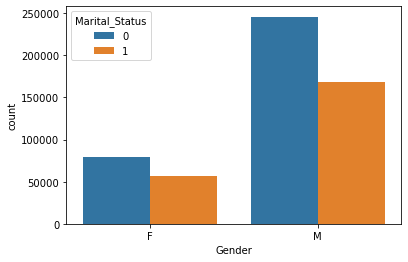

In [490]:
sns.countplot(walmart_data['Gender'], hue=walmart_data['Marital_Status'])
plt.show()

`Male and Unmarried customers are more in counts.`\
`In Gender specific also Unmarried customers are more than married`

In [491]:
walmart_data.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

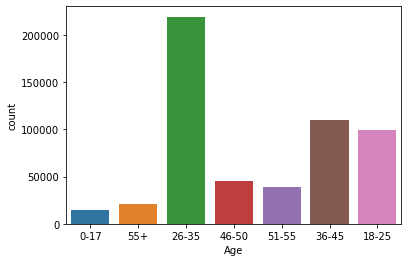

In [492]:
sns.countplot(walmart_data['Age'])
plt.show()

`Most of the customers age in 26-35 range`

In [493]:
walmart_data.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

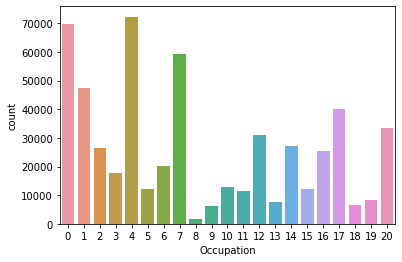

In [494]:
sns.countplot(walmart_data['Occupation'])
plt.show()

`Occupation type 0,4 and 7 are most popular in customers`

In [495]:
walmart_data.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

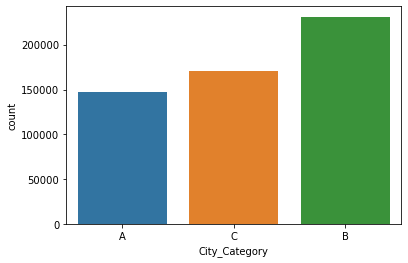

In [496]:
sns.countplot(walmart_data['City_Category'])
plt.show()

`Convert 4+ into 4 and convert Stay column to int` 

In [497]:
walmart_data['Stay_In_Current_City_Years'] = walmart_data['Stay_In_Current_City_Years'].replace('4+','4')
walmart_data['Stay_In_Current_City_Years'] = walmart_data['Stay_In_Current_City_Years'].astype(int)

In [498]:
walmart_data.Stay_In_Current_City_Years.value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

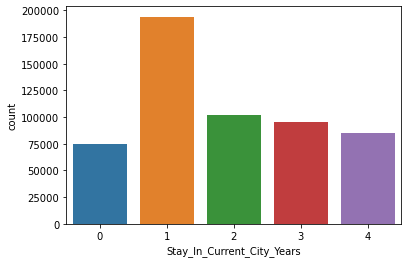

In [499]:
sns.countplot(walmart_data['Stay_In_Current_City_Years'])
plt.show()

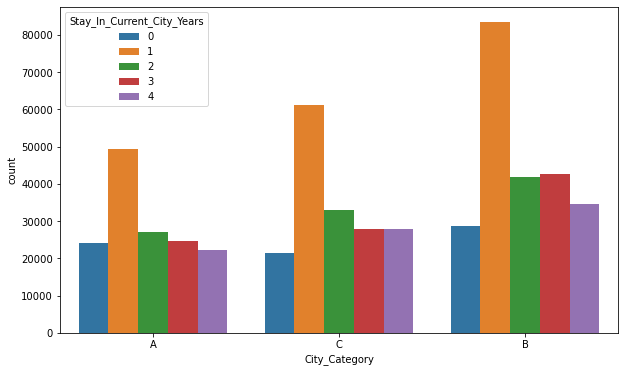

In [500]:
plt.figure(figsize=(10,6))
sns.countplot(walmart_data['City_Category'], hue=walmart_data['Stay_In_Current_City_Years'])
plt.show()

`In each city type, most of the customers stay for 1 year.`

In [501]:
walmart_data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

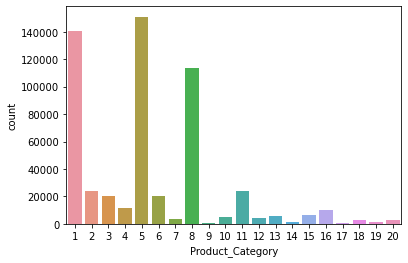

In [502]:
sns.countplot(walmart_data['Product_Category'])
plt.show()

`Product category 1, 5 and 8 are most pouplar`

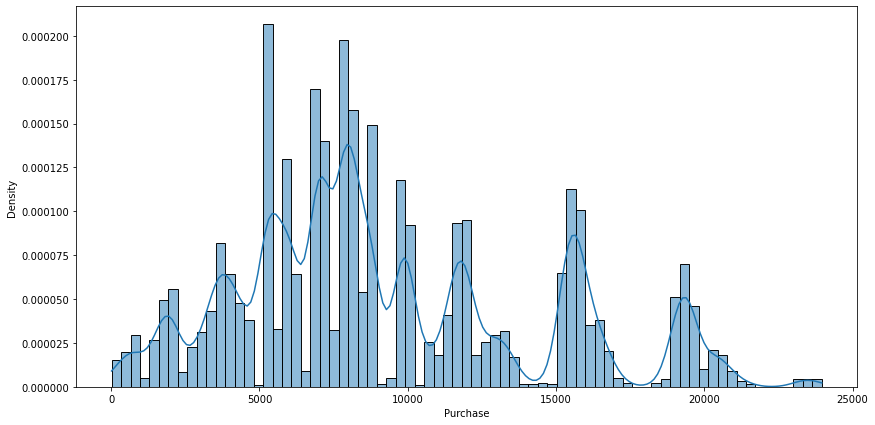

In [503]:
plt.figure(figsize=(14,7))
sns.histplot(walmart_data['Purchase'], kde=True, stat='density', bins=75)
plt.show()

`Purchase has peak in range 5000 to 10000 but there is no particular distribution.`

`Lets check purchase pattern for most popular products only those are 1, 5 and 8`

In [504]:
walmart_data_cat158 = walmart_data[walmart_data['Product_Category'].isin([1,5,8])]

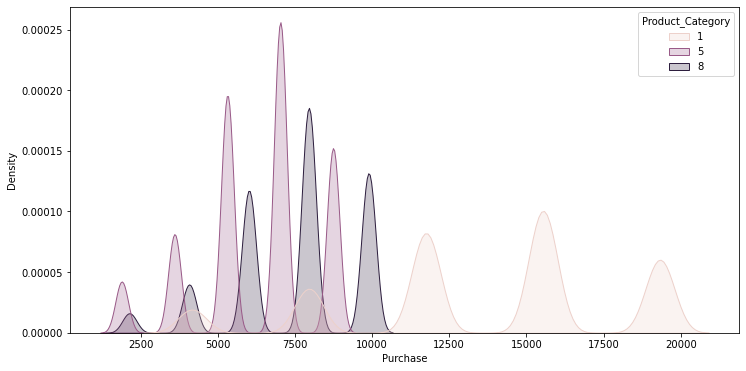

In [505]:
plt.figure(figsize=(12,6))
sns.kdeplot(data = walmart_data_cat158, x = 'Purchase', hue='Product_Category', fill=True)
plt.show()

`Product category 1 purchase amount has higher range till 20000.`\
`Between Product category 5 and 8, 5 has more density in each purchase range.`
***

### Population mean and Confidence Intervals

#### Average and CI of Spending for Male and Female

In [506]:
walmart_data_male = walmart_data[walmart_data['Gender']=='M']
walmart_data_female = walmart_data[walmart_data['Gender']=='F']

In [507]:
print('Male: ', walmart_data_male.shape, 'Female:',walmart_data_female.shape)

Male:  (414259, 10) Female: (135809, 10)


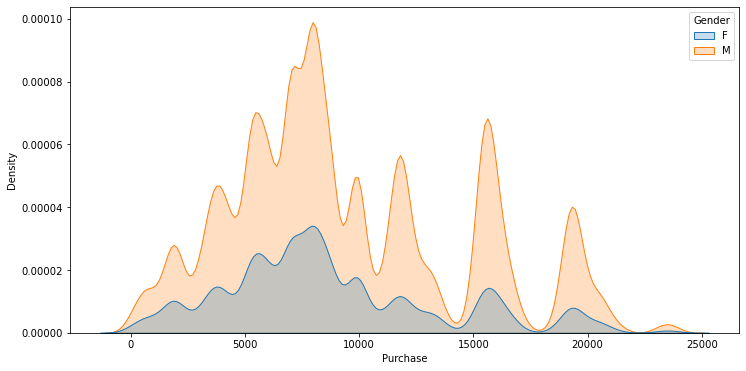

In [508]:
plt.figure(figsize=(12,6))
sns.kdeplot(data = walmart_data, x = 'Purchase', hue='Gender', fill=True)
plt.show()

### Average Purchase and Confidence Interval for 50 million male and 50 million female

In [509]:
#get poupulation mean with CLT and bootstrapping
def get_means(vals, r=1000, size=5000):
    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(vals, size=size)
        bs_means[i] = np.mean(bs_sample)
        
    return bs_means

In [510]:
male_purchase_means = get_means(walmart_data_male['Purchase'], r=10000, size=50000)

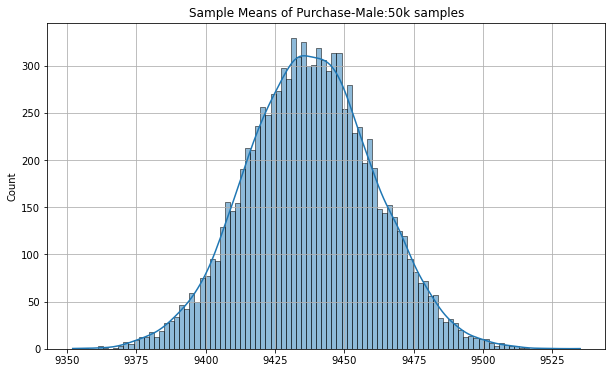

In [511]:
plt.figure(figsize=(10,6))
sns.histplot(male_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Male:50k samples')
plt.grid()
plt.show()

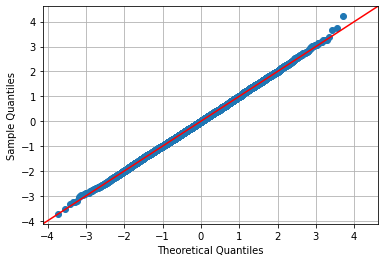

In [512]:
fig = sm.qqplot(male_purchase_means, line='45', fit=True)
plt.grid()

In [513]:
female_purchase_means = get_means(walmart_data_female['Purchase'], r=10000, size=50000)

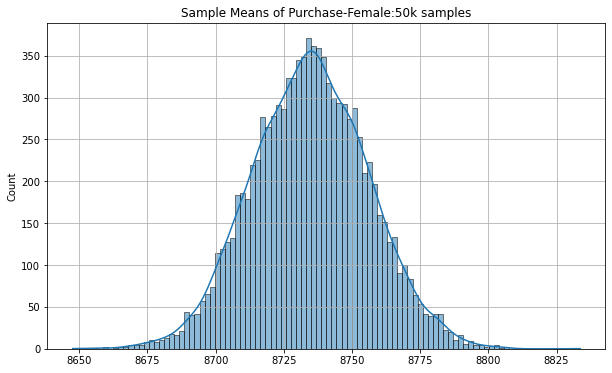

In [514]:
plt.figure(figsize=(10,6))
sns.histplot(female_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Female:50k samples')
plt.grid()
plt.show()

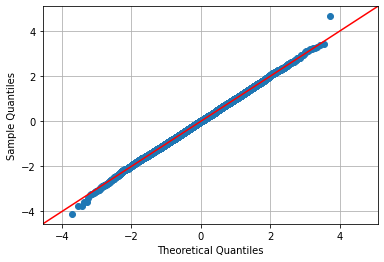

In [515]:
fig = sm.qqplot(female_purchase_means, line='45', fit=True)
plt.grid()

`Distribution of sample means is Gaussian and confirmed with QQ plot.`

In [516]:
print('Mean of sample means - Male',np.mean(male_purchase_means))
print('Std Dev of sample means - Male', np.std(male_purchase_means))

Mean of sample means - Male 9437.85681854
Std Dev of sample means - Male 23.023351064922164


In [517]:
print('Mean of sample means - Female',np.mean(female_purchase_means))
print('Std Dev of sample means - Female', np.std(female_purchase_means))

Mean of sample means - Female 8734.791650703999
Std Dev of sample means - Female 21.22278246362639


`Mean of Female is less than Male spends`

In [518]:
print("50k samples")
print(f"95% CI for male: [{np.mean(male_purchase_means)-2*np.std(male_purchase_means)}, {np.mean(male_purchase_means)+2*np.std(male_purchase_means)}]")
print(f"95% CI for female: [{np.mean(female_purchase_means)-2*np.std(female_purchase_means)}, {np.mean(female_purchase_means)+2*np.std(female_purchase_means)}]")


50k samples
95% CI for male: [9391.810116410155, 9483.903520669845]
95% CI for female: [8692.346085776746, 8777.237215631252]


`95% CI of male and female spends are not overlapping with each other.`

### Try with different sample size

In [519]:
#sample size 1000
male_purchase_means_1k = get_means(walmart_data_male['Purchase'], r=10000, size=1000)
female_purchase_means_1k = get_means(walmart_data_female['Purchase'], r=10000, size=1000)

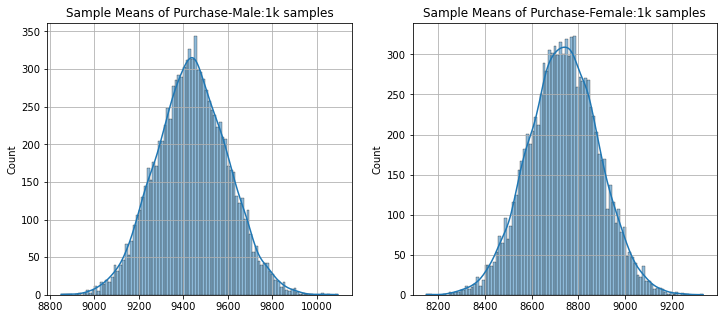

In [520]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(male_purchase_means_1k, bins=100, kde=True)
plt.title('Sample Means of Purchase-Male:1k samples')
plt.grid()

plt.subplot(1,2,2)
sns.histplot(female_purchase_means_1k, bins=100, kde=True)
plt.title('Sample Means of Purchase-Female:1k samples')
plt.grid()

plt.show()

In [521]:
#sample size 10000
male_purchase_means_10k = get_means(walmart_data_male['Purchase'], r=10000, size=10000)
female_purchase_means_10k = get_means(walmart_data_female['Purchase'], r=10000, size=10000)

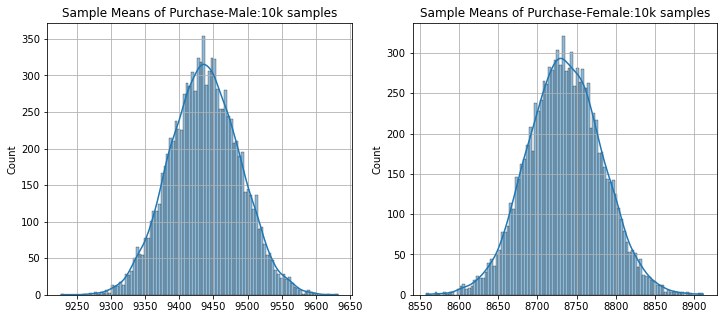

In [522]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(male_purchase_means_10k, bins=100, kde=True)
plt.title('Sample Means of Purchase-Male:10k samples')
plt.grid()

plt.subplot(1,2,2)
sns.histplot(female_purchase_means_10k, bins=100, kde=True)
plt.title('Sample Means of Purchase-Female:10k samples')
plt.grid()

plt.show()

In [523]:
#sample size 100k
male_purchase_means_100k = get_means(walmart_data_male['Purchase'], r=10000, size=100000)
female_purchase_means_100k = get_means(walmart_data_female['Purchase'], r=10000, size=100000)

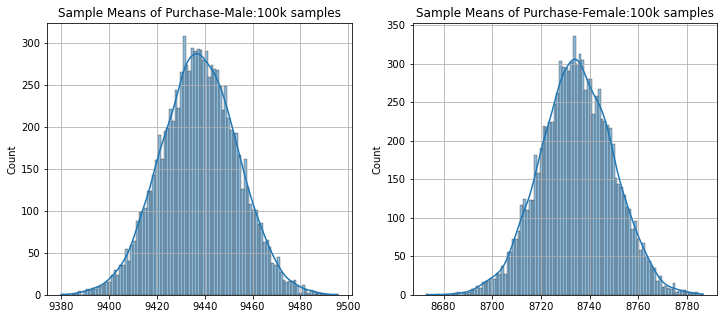

In [524]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(male_purchase_means_100k, bins=100, kde=True)
plt.title('Sample Means of Purchase-Male:100k samples')
plt.grid()

plt.subplot(1,2,2)
sns.histplot(female_purchase_means_100k, bins=100, kde=True)
plt.title('Sample Means of Purchase-Female:100k samples')
plt.grid()

plt.show()

In [525]:
print("1k samples")
print(f"95% CI for male: [{np.mean(male_purchase_means_1k)-2*np.std(male_purchase_means_1k)}, {np.mean(male_purchase_means_1k)+2*np.std(male_purchase_means_1k)}]")
print(f"95% CI for female: [{np.mean(female_purchase_means_1k)-2*np.std(female_purchase_means_1k)}, {np.mean(female_purchase_means_1k)+2*np.std(female_purchase_means_1k)}]")


1k samples
95% CI for male: [9116.737214196639, 9760.743281003362]
95% CI for female: [8433.63004389002, 9036.60293890998]


In [526]:
print("10k samples")
print(f"95% CI for male: [{np.mean(male_purchase_means_10k)-2*np.std(male_purchase_means_10k)}, {np.mean(male_purchase_means_10k)+2*np.std(male_purchase_means_10k)}]")
print(f"95% CI for female: [{np.mean(female_purchase_means_10k)-2*np.std(female_purchase_means_10k)}, {np.mean(female_purchase_means_10k)+2*np.std(female_purchase_means_10k)}]")


10k samples
95% CI for male: [9335.387959560872, 9538.975367719124]
95% CI for female: [8640.085613386324, 8829.260989313676]


In [527]:
print("100k samples")
print(f"95% CI for male: [{np.mean(male_purchase_means_100k)-2*np.std(male_purchase_means_100k)}, {np.mean(male_purchase_means_100k)+2*np.std(male_purchase_means_100k)}]")
print(f"95% CI for female: [{np.mean(female_purchase_means_100k)-2*np.std(female_purchase_means_100k)}, {np.mean(female_purchase_means_100k)+2*np.std(female_purchase_means_100k)}]")


100k samples
95% CI for male: [9405.873075141497, 9469.593301566505]
95% CI for female: [8704.727204122668, 8764.619088483334]


`Different sample sizes distributions look same as normally distributed but CI is varying alot`\
`At 1k samples(10k iterations), we are getting wider range for 95% CI but at very large sample size 100k, getting very narrowed range`\
`There is no overlap between Male and female spends`

### Let's try different CI:90 and 99% on different sizes

In [528]:
print("1k samples")
print(f"90% CI for male: [{np.percentile(male_purchase_means_1k,5)}, {np.percentile(male_purchase_means_1k,95)}]")
print(f"90% CI for female: [{np.percentile(female_purchase_means_1k,5)}, {np.percentile(female_purchase_means_1k,95)}]")

1k samples
90% CI for male: [9176.4831, 9702.36345]
90% CI for female: [8484.2838, 8982.52325]


In [529]:
print("1k samples")
print(f"99% CI for male: [{np.percentile(male_purchase_means_1k,0.5)}, {np.percentile(male_purchase_means_1k,99.5)}]")
print(f"99% CI for female: [{np.percentile(female_purchase_means_1k,0.5)}, {np.percentile(female_purchase_means_1k,99.5)}]")

1k samples
99% CI for male: [9035.265245, 9850.285805]
99% CI for female: [8344.165375, 9119.391819999999]


In [530]:
print("100k samples")
print(f"90% CI for male: [{np.percentile(male_purchase_means_100k,5)}, {np.percentile(male_purchase_means_100k,95)}]")
print(f"90% CI for female: [{np.percentile(female_purchase_means_100k,5)}, {np.percentile(female_purchase_means_100k,95)}]")

100k samples
90% CI for male: [9411.62601, 9463.8519995]
90% CI for female: [8710.0720835, 8759.291360000001]


In [531]:
print("100k samples")
print(f"99% CI for male: [{np.percentile(male_purchase_means_100k,0.5)}, {np.percentile(male_purchase_means_100k,99.5)}]")
print(f"99% CI for female: [{np.percentile(female_purchase_means_100k,0.5)}, {np.percentile(female_purchase_means_100k,99.5)}]")

100k samples
99% CI for male: [9395.972103349999, 9478.319481499999]
99% CI for female: [8695.44572365, 8773.43946025]


`At different sizes and CI, male and female spends are not overlapping with each other.`

`No of samples increasing, range of CI is decreasing`\
`% of CI is increasing, range of CI is increasing`

#### Average and CI of Spending for Married and Unmarried

In [532]:
walmart_data_married = walmart_data[walmart_data['Marital_Status']==1]
walmart_data_unmarried = walmart_data[walmart_data['Marital_Status']==0]

In [533]:
print('Married: ', walmart_data_married.shape, 'Unmarried:',walmart_data_unmarried.shape)

Married:  (225337, 10) Unmarried: (324731, 10)


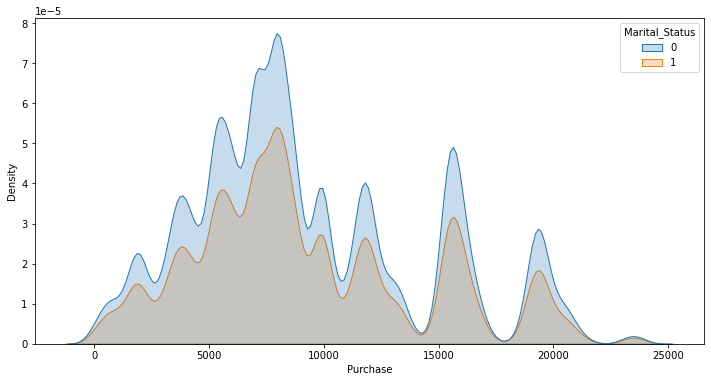

In [534]:
plt.figure(figsize=(12,6))
sns.kdeplot(data = walmart_data, x = 'Purchase', hue='Marital_Status', fill=True)
plt.show()

In [535]:
married_purchase_means = get_means(walmart_data_married['Purchase'], r=10000, size=50000)
unmarried_purchase_means = get_means(walmart_data_unmarried['Purchase'], r=10000, size=50000)

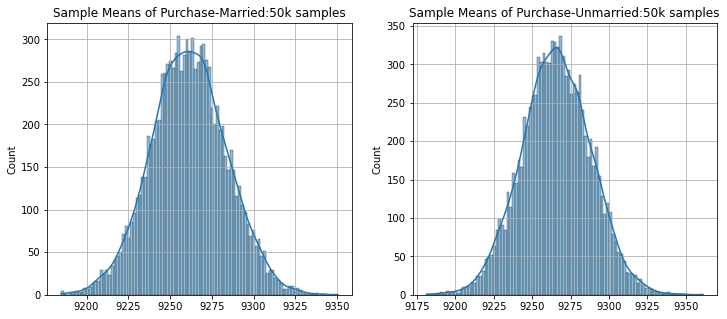

In [536]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(married_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Married:50k samples')
plt.grid()

plt.subplot(1,2,2)
sns.histplot(unmarried_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Unmarried:50k samples')
plt.grid()

plt.show()

In [537]:
print('Mean of sample means - Married',np.mean(married_purchase_means))
print('Std Dev of sample means - Married', np.std(married_purchase_means))

Mean of sample means - Married 9261.268332706002
Std Dev of sample means - Married 22.517426442298927


In [538]:
print('Mean of sample means - Unmarried',np.mean(unmarried_purchase_means))
print('Std Dev of sample means - Unmarried', np.std(unmarried_purchase_means))

Mean of sample means - Unmarried 9265.653864532
Std Dev of sample means - Unmarried 22.426419818471274


`Mean of married and unmarried is very close`

In [539]:
print("50k samples")
print(f"95% CI for Married: [{np.mean(married_purchase_means)-2*np.std(married_purchase_means)}, {np.mean(married_purchase_means)+2*np.std(married_purchase_means)}]")
print(f"95% CI for Unmarried: [{np.mean(unmarried_purchase_means)-2*np.std(unmarried_purchase_means)}, {np.mean(unmarried_purchase_means)+2*np.std(unmarried_purchase_means)}]")


50k samples
95% CI for Married: [9216.233479821405, 9306.3031855906]
95% CI for Unmarried: [9220.801024895058, 9310.506704168942]


In [540]:
print("50k samples")
print(f"90% CI for married: [{np.percentile(married_purchase_means,5)}, {np.percentile(married_purchase_means,95)}]")
print(f"90% CI for unmarried: [{np.percentile(unmarried_purchase_means,5)}, {np.percentile(unmarried_purchase_means,95)}]")

50k samples
90% CI for married: [9224.252833999999, 9298.852841]
90% CI for unmarried: [9228.624206999999, 9302.235087000001]


In [541]:
print("50k samples")
print(f"99% CI for married: [{np.percentile(married_purchase_means,0.5)}, {np.percentile(married_purchase_means,99.5)}]")
print(f"99% CI for unmarried: [{np.percentile(unmarried_purchase_means,0.5)}, {np.percentile(unmarried_purchase_means,99.5)}]")

50k samples
99% CI for married: [9204.0233725, 9319.796197599999]
99% CI for unmarried: [9207.226297700001, 9323.4071563]


`95% CI of Married and Unmarried overlapping almost`\
`90% and 99% CI are also overlapping.`

In [542]:
#for 200k samples
married_purchase_means_200k = get_means(walmart_data_married['Purchase'], r=10000, size=200000)
unmarried_purchase_means_200k = get_means(walmart_data_unmarried['Purchase'], r=10000, size=200000)

In [543]:
print("200k samples")
print(f"95% CI for Married:200k samples: [{np.mean(married_purchase_means_200k)-2*np.std(married_purchase_means_200k)}, {np.mean(married_purchase_means_200k)+2*np.std(married_purchase_means_200k)}]")
print(f"95% CI for Unmarried:200k samples: [{np.mean(unmarried_purchase_means_200k)-2*np.std(unmarried_purchase_means_200k)}, {np.mean(unmarried_purchase_means_200k)+2*np.std(unmarried_purchase_means_200k)}]")


200k samples
95% CI for Married:200k samples: [9239.040471796243, 9283.458368078756]
95% CI for Unmarried:200k samples: [9243.308146997946, 9288.242275032057]


In [544]:
print("200k samples")
print(f"90% CI for Married:200k samples [{np.percentile(married_purchase_means_200k,5)}, {np.percentile(married_purchase_means_200k,95)}]")
print(f"90% CI for Unmarried:200k samples [{np.percentile(unmarried_purchase_means_200k,5)}, {np.percentile(unmarried_purchase_means_200k,95)}]")

200k samples
90% CI for Married:200k samples [9242.77428275, 9279.24583275]
90% CI for Unmarried:200k samples [9247.1293865, 9284.18580725]


In [545]:
print("200k samples")
print(f"99% CI for Married:200k samples [{np.percentile(married_purchase_means_200k,0.5)}, {np.percentile(married_purchase_means_200k,99.5)}]")
print(f"99% CI for Unmarried:200k samples [{np.percentile(unmarried_purchase_means_200k,0.5)}, {np.percentile(unmarried_purchase_means_200k,99.5)}]")

200k samples
99% CI for Married:200k samples [9233.742592575, 9290.292387075]
99% CI for Unmarried:200k samples [9237.031789425, 9295.595332025]


`with 200k sample size, we are gettin more narrower range of population means at each CIs`

#### Average and CI of Spending for Age groups

In [546]:
walmart_data_0_17 = walmart_data[walmart_data['Age']=='0-17']
walmart_data_18_25 = walmart_data[walmart_data['Age']=='18-25']
walmart_data_26_35 = walmart_data[walmart_data['Age']=='26-35']
walmart_data_36_45 = walmart_data[walmart_data['Age']=='36-45']
walmart_data_46_50 = walmart_data[walmart_data['Age']=='46-50']
walmart_data_51_55 = walmart_data[walmart_data['Age']=='51-55']
walmart_data_55 = walmart_data[walmart_data['Age']=='55+']

In [547]:
print('0-17: ', walmart_data_0_17.shape, '18-25:',walmart_data_18_25.shape)
print('26-35: ', walmart_data_26_35.shape, '36-45:',walmart_data_36_45.shape)
print('46-50: ', walmart_data_46_50.shape, '51-55:',walmart_data_51_55.shape, '55+', walmart_data_55.shape)

0-17:  (15102, 10) 18-25: (99660, 10)
26-35:  (219587, 10) 36-45: (110013, 10)
46-50:  (45701, 10) 51-55: (38501, 10) 55+ (21504, 10)


`No of customers in  Age range in 0-17 and 46-55+' are very less.`\
`26-35 age range has large chunk of population`

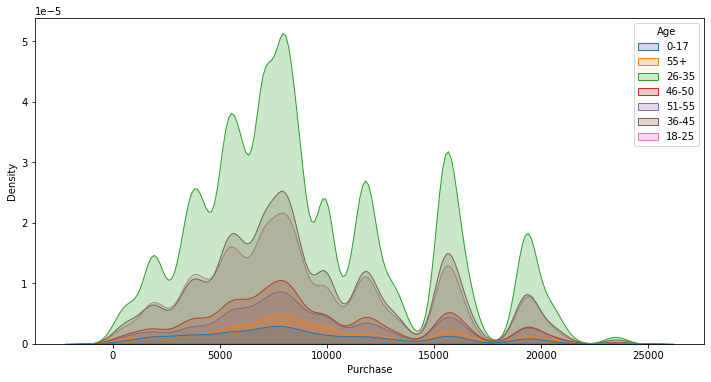

In [548]:
plt.figure(figsize=(12,6))
sns.kdeplot(data = walmart_data, x = 'Purchase', hue='Age', fill=True)
plt.show()

In [549]:
age_0_17_purchase_means = get_means(walmart_data_0_17['Purchase'], r=10000, size=10000)
age_18_25_purchase_means = get_means(walmart_data_18_25['Purchase'], r=10000, size=10000)
age_26_35_purchase_means = get_means(walmart_data_26_35['Purchase'], r=10000, size=10000)
age_36_45_purchase_means = get_means(walmart_data_36_45['Purchase'], r=10000, size=10000)
age_46_50_purchase_means = get_means(walmart_data_46_50['Purchase'], r=10000, size=10000)
age_51_55_purchase_means = get_means(walmart_data_51_55['Purchase'], r=10000, size=10000)
age_55_purchase_means = get_means(walmart_data_55['Purchase'], r=10000, size=10000)

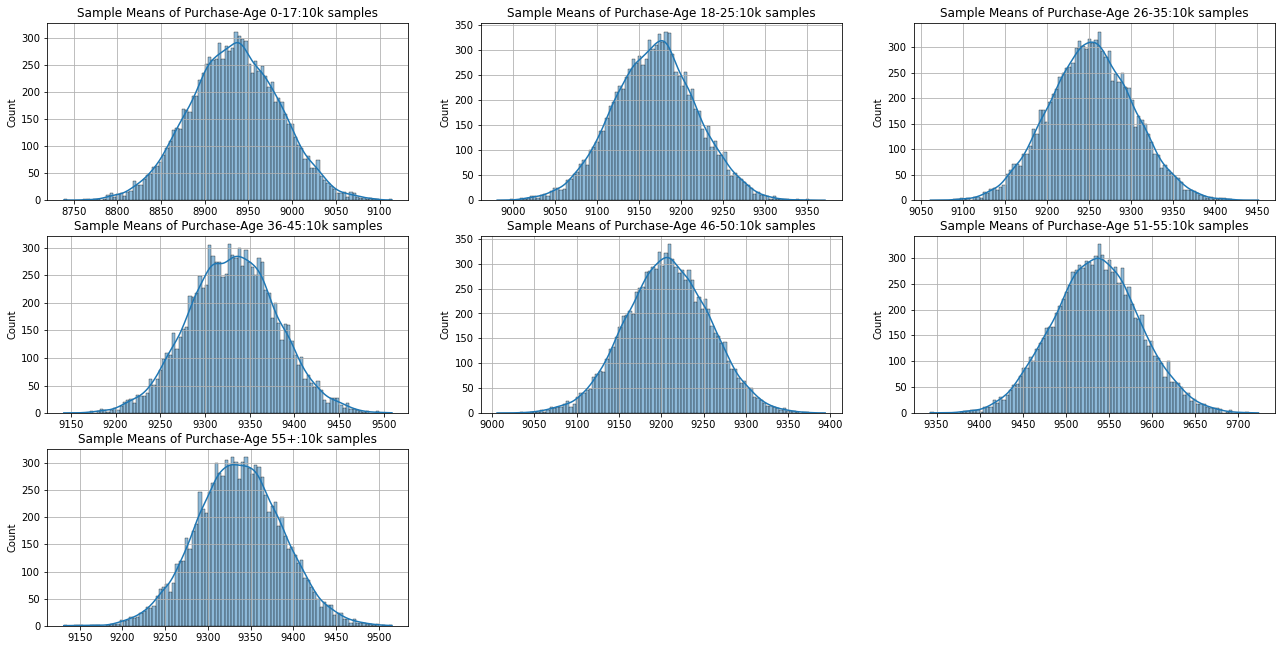

In [550]:
plt.figure(figsize=(22,15))
plt.subplot(4,3,1)
sns.histplot(age_0_17_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 0-17:10k samples')
plt.grid()

plt.subplot(4,3,2)
sns.histplot(age_18_25_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 18-25:10k samples')
plt.grid()

plt.subplot(4,3,3)
sns.histplot(age_26_35_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 26-35:10k samples')
plt.grid()

plt.subplot(4,3,4)
sns.histplot(age_36_45_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 36-45:10k samples')
plt.grid()

plt.subplot(4,3,5)
sns.histplot(age_46_50_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 46-50:10k samples')
plt.grid()

plt.subplot(4,3,6)
sns.histplot(age_51_55_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 51-55:10k samples')
plt.grid()

plt.subplot(4,3,7)
sns.histplot(age_55_purchase_means, bins=100, kde=True)
plt.title('Sample Means of Purchase-Age 55+:10k samples')
plt.grid()


plt.show()

In [551]:
print(f"Mean of sample means:Age 0-17: {np.mean(age_0_17_purchase_means)}, \nMean of sample means:Age 18-25 {np.mean(age_18_25_purchase_means)},\
\nMean of sample means:Age 26-35 {np.mean(age_26_35_purchase_means)}, \nMean of sample means:Age 36-45 : {np.mean(age_36_45_purchase_means)},\
\nMean of sample means:Age 46-50: {np.mean(age_46_50_purchase_means)}, \nMean of sample means:Age 51-55: {np.mean(age_51_55_purchase_means)},\
\nMean of sample means:Age 55+ : {np.mean(age_55_purchase_means)}")

Mean of sample means:Age 0-17: 8933.938525089998, 
Mean of sample means:Age 18-25 9168.18065977,
Mean of sample means:Age 26-35 9252.61815841, 
Mean of sample means:Age 36-45 : 9331.06340014,
Mean of sample means:Age 46-50: 9207.53889655, 
Mean of sample means:Age 51-55: 9535.67141858,
Mean of sample means:Age 55+ : 9336.337643060002


`Age 0-17 mean is min where 51-55 mean is max.`

In [552]:
print("10k samples")
print(f"95% CI for Age 0-17: [{np.mean(age_0_17_purchase_means)-2*np.std(age_0_17_purchase_means)}, {np.mean(age_0_17_purchase_means)+2*np.std(age_0_17_purchase_means)}]")
print(f"95% CI for Age 18-25: [{np.mean(age_18_25_purchase_means)-2*np.std(age_18_25_purchase_means)}, {np.mean(age_18_25_purchase_means)+2*np.std(age_18_25_purchase_means)}]")
print(f"95% CI for Age 26-35: [{np.mean(age_26_35_purchase_means)-2*np.std(age_26_35_purchase_means)}, {np.mean(age_26_35_purchase_means)+2*np.std(age_26_35_purchase_means)}]")
print(f"95% CI for Age 36-45: [{np.mean(age_36_45_purchase_means)-2*np.std(age_36_45_purchase_means)}, {np.mean(age_36_45_purchase_means)+2*np.std(age_36_45_purchase_means)}]")
print(f"95% CI for Age 46-50: [{np.mean(age_46_50_purchase_means)-2*np.std(age_46_50_purchase_means)}, {np.mean(age_46_50_purchase_means)+2*np.std(age_46_50_purchase_means)}]")
print(f"95% CI for Age 51-55: [{np.mean(age_51_55_purchase_means)-2*np.std(age_51_55_purchase_means)}, {np.mean(age_51_55_purchase_means)+2*np.std(age_51_55_purchase_means)}]")
print(f"95% CI for Age 55+: [{np.mean(age_55_purchase_means)-2*np.std(age_55_purchase_means)}, {np.mean(age_55_purchase_means)+2*np.std(age_55_purchase_means)}]")


10k samples
95% CI for Age 0-17: [8831.070243429167, 9036.806806750828]
95% CI for Age 18-25: [9067.878959664255, 9268.482359875745]
95% CI for Age 26-35: [9151.948534693458, 9353.287782126541]
95% CI for Age 36-45: [9232.122195780907, 9430.004604499092]
95% CI for Age 46-50: [9108.074698596578, 9307.003094503423]
95% CI for Age 51-55: [9434.554275406115, 9636.788561753883]
95% CI for Age 55+: [9236.251339623444, 9436.42394649656]


In [553]:
print("10k samples")
print(f"90% CI for Age 0-17: [{np.percentile(age_0_17_purchase_means,5)}, {np.percentile(age_0_17_purchase_means,95)}]")
print(f"90% CI for Age 18-25: [{np.percentile(age_18_25_purchase_means,5)}, {np.percentile(age_18_25_purchase_means,95)}]")
print(f"90% CI for Age 26-35: [{np.percentile(age_26_35_purchase_means,5)}, {np.percentile(age_26_35_purchase_means,95)}]")
print(f"90% CI for Age 36-45: [{np.percentile(age_36_45_purchase_means,5)}, {np.percentile(age_36_45_purchase_means,95)}]")
print(f"90% CI for Age 46-50: [{np.percentile(age_46_50_purchase_means,5)}, {np.percentile(age_46_50_purchase_means,95)}]")
print(f"90% CI for Age 51-55: [{np.percentile(age_51_55_purchase_means,5)}, {np.percentile(age_51_55_purchase_means,95)}]")
print(f"90% CI for Age 55+: [{np.percentile(age_55_purchase_means,5)}, {np.percentile(age_55_purchase_means,95)}]")

10k samples
90% CI for Age 0-17: [8849.461285, 9019.051005000001]
90% CI for Age 18-25: [9085.37703, 9251.023535]
90% CI for Age 26-35: [9169.880115, 9335.91761]
90% CI for Age 36-45: [9250.776135, 9411.876225]
90% CI for Age 46-50: [9125.877895, 9288.727115]
90% CI for Age 51-55: [9452.308025, 9619.816525]
90% CI for Age 55+: [9253.473215, 9418.700565000001]


In [554]:
print("10k samples")
print(f"99% CI for Age 0-17: [{np.percentile(age_0_17_purchase_means,0.5)}, {np.percentile(age_0_17_purchase_means,99.5)}]")
print(f"99% CI for Age 18-25: [{np.percentile(age_18_25_purchase_means,0.5)}, {np.percentile(age_18_25_purchase_means,99.5)}]")
print(f"99% CI for Age 26-35: [{np.percentile(age_26_35_purchase_means,0.5)}, {np.percentile(age_26_35_purchase_means,99.5)}]")
print(f"99% CI for Age 36-45: [{np.percentile(age_36_45_purchase_means,0.5)}, {np.percentile(age_36_45_purchase_means,99.5)}]")
print(f"99% CI for Age 46-50: [{np.percentile(age_46_50_purchase_means,0.5)}, {np.percentile(age_46_50_purchase_means,99.5)}]")
print(f"99% CI for Age 51-55: [{np.percentile(age_51_55_purchase_means,0.5)}, {np.percentile(age_51_55_purchase_means,99.5)}]")
print(f"99% CI for Age 55+: [{np.percentile(age_55_purchase_means,0.5)}, {np.percentile(age_55_purchase_means,99.5)}]")

10k samples
99% CI for Age 0-17: [8799.839944000001, 9068.606812]
99% CI for Age 18-25: [9035.549256, 9295.158341]
99% CI for Age 26-35: [9127.426239, 9381.512709999999]
99% CI for Age 36-45: [9204.8797925, 9459.396927]
99% CI for Age 46-50: [9075.622301, 9334.659828999998]
99% CI for Age 51-55: [9409.607330499999, 9665.998513499999]
99% CI for Age 55+: [9208.3161335, 9467.532482]


`Age range 18-25,26-35, 36-45,46-50 and 55+ CI are overlapping with each other`

In [555]:
print('0-17: ', walmart_data_0_17.shape, '18-25:',walmart_data_18_25.shape)
print('26-35: ', walmart_data_26_35.shape, '36-45:',walmart_data_36_45.shape)
print('46-50: ', walmart_data_46_50.shape, '51-55:',walmart_data_51_55.shape, '55+', walmart_data_55.shape)

0-17:  (15102, 10) 18-25: (99660, 10)
26-35:  (219587, 10) 36-45: (110013, 10)
46-50:  (45701, 10) 51-55: (38501, 10) 55+ (21504, 10)


In [556]:
#try large no of samples
age_0_17_purchase_means_2 = get_means(walmart_data_0_17['Purchase'], r=10000, size=15000)
age_18_25_purchase_means_2 = get_means(walmart_data_18_25['Purchase'], r=10000, size=90000)
age_26_35_purchase_means_2 = get_means(walmart_data_26_35['Purchase'], r=10000, size=100000)
age_36_45_purchase_means_2 = get_means(walmart_data_36_45['Purchase'], r=10000, size=100000)
age_46_50_purchase_means_2 = get_means(walmart_data_46_50['Purchase'], r=10000, size=40000)
age_51_55_purchase_means_2 = get_means(walmart_data_51_55['Purchase'], r=10000, size=30000)
age_55_purchase_means_2 = get_means(walmart_data_55['Purchase'], r=10000, size=20000)

In [557]:
print("large no of samples")
print(f"95% CI for Age 0-17: [{np.mean(age_0_17_purchase_means_2)-2*np.std(age_0_17_purchase_means_2)}, {np.mean(age_0_17_purchase_means_2)+2*np.std(age_0_17_purchase_means_2)}]")
print(f"95% CI for Age 18-25: [{np.mean(age_18_25_purchase_means_2)-2*np.std(age_18_25_purchase_means_2)}, {np.mean(age_18_25_purchase_means_2)+2*np.std(age_18_25_purchase_means_2)}]")
print(f"95% CI for Age 26-35: [{np.mean(age_26_35_purchase_means_2)-2*np.std(age_26_35_purchase_means_2)}, {np.mean(age_26_35_purchase_means_2)+2*np.std(age_26_35_purchase_means_2)}]")
print(f"95% CI for Age 36-45: [{np.mean(age_36_45_purchase_means_2)-2*np.std(age_36_45_purchase_means_2)}, {np.mean(age_36_45_purchase_means_2)+2*np.std(age_36_45_purchase_means_2)}]")
print(f"95% CI for Age 46-50: [{np.mean(age_46_50_purchase_means_2)-2*np.std(age_46_50_purchase_means_2)}, {np.mean(age_46_50_purchase_means_2)+2*np.std(age_46_50_purchase_means_2)}]")
print(f"95% CI for Age 51-55: [{np.mean(age_51_55_purchase_means_2)-2*np.std(age_51_55_purchase_means_2)}, {np.mean(age_51_55_purchase_means_2)+2*np.std(age_51_55_purchase_means_2)}]")
print(f"95% CI for Age 55+: [{np.mean(age_55_purchase_means_2)-2*np.std(age_55_purchase_means_2)}, {np.mean(age_55_purchase_means_2)+2*np.std(age_55_purchase_means_2)}]")


large no of samples
95% CI for Age 0-17: [8849.945490602046, 9017.593876437955]
95% CI for Age 18-25: [9136.481466429579, 9203.044701192643]
95% CI for Age 26-35: [9220.289355014334, 9284.517787593664]
95% CI for Age 36-45: [9300.240756841653, 9363.271145466348]
95% CI for Age 46-50: [9158.787248721399, 9258.506131968597]
95% CI for Age 51-55: [9476.692628483215, 9593.224561256782]
95% CI for Age 55+: [9265.521127991586, 9408.181246398413]


In [558]:
print("large no of samples")
print(f"90% CI for Age 0-17: [{np.percentile(age_0_17_purchase_means_2,5)}, {np.percentile(age_0_17_purchase_means_2,95)}]")
print(f"90% CI for Age 18-25: [{np.percentile(age_18_25_purchase_means_2,5)}, {np.percentile(age_18_25_purchase_means_2,95)}]")
print(f"90% CI for Age 26-35: [{np.percentile(age_26_35_purchase_means_2,5)}, {np.percentile(age_26_35_purchase_means_2,95)}]")
print(f"90% CI for Age 36-45: [{np.percentile(age_36_45_purchase_means_2,5)}, {np.percentile(age_36_45_purchase_means_2,95)}]")
print(f"90% CI for Age 46-50: [{np.percentile(age_46_50_purchase_means_2,5)}, {np.percentile(age_46_50_purchase_means_2,95)}]")
print(f"90% CI for Age 51-55: [{np.percentile(age_51_55_purchase_means_2,5)}, {np.percentile(age_51_55_purchase_means_2,95)}]")
print(f"90% CI for Age 55+: [{np.percentile(age_55_purchase_means_2,5)}, {np.percentile(age_55_purchase_means_2,95)}]")

large no of samples
90% CI for Age 0-17: [8864.433463333333, 9002.84852]
90% CI for Age 18-25: [9142.537568888889, 9196.741895555555]
90% CI for Age 26-35: [9226.2579275, 9279.218563999999]
90% CI for Age 36-45: [9305.845227000002, 9357.3549055]
90% CI for Age 46-50: [9167.927435, 9249.540993749999]
90% CI for Age 51-55: [9486.610496666666, 9582.141986666667]
90% CI for Age 55+: [9278.75073, 9396.387195]


In [559]:
print("large no of samples")
print(f"99% CI for Age 0-17: [{np.percentile(age_0_17_purchase_means_2,0.5)}, {np.percentile(age_0_17_purchase_means_2,99.5)}]")
print(f"99% CI for Age 18-25: [{np.percentile(age_18_25_purchase_means_2,0.5)}, {np.percentile(age_18_25_purchase_means_2,99.5)}]")
print(f"99% CI for Age 26-35: [{np.percentile(age_26_35_purchase_means_2,0.5)}, {np.percentile(age_26_35_purchase_means_2,99.5)}]")
print(f"99% CI for Age 36-45: [{np.percentile(age_36_45_purchase_means_2,0.5)}, {np.percentile(age_36_45_purchase_means_2,99.5)}]")
print(f"99% CI for Age 46-50: [{np.percentile(age_46_50_purchase_means_2,0.5)}, {np.percentile(age_46_50_purchase_means_2,99.5)}]")
print(f"99% CI for Age 51-55: [{np.percentile(age_51_55_purchase_means_2,0.5)}, {np.percentile(age_51_55_purchase_means_2,99.5)}]")
print(f"99% CI for Age 55+: [{np.percentile(age_55_purchase_means_2,0.5)}, {np.percentile(age_55_purchase_means_2,99.5)}]")

large no of samples
99% CI for Age 0-17: [8825.729647, 9039.835393333333]
99% CI for Age 18-25: [9126.665527055555, 9213.182320111111]
99% CI for Age 26-35: [9210.1899543, 9293.42248235]
99% CI for Age 36-45: [9291.84243335, 9372.15143885]
99% CI for Age 46-50: [9146.24666675, 9273.143007875]
99% CI for Age 51-55: [9458.756494666666, 9610.080084]
99% CI for Age 55+: [9244.962915, 9428.388011]


`With large no of samples, we are getting more narrower range of population.`

## Recommendations

`1. Walmart should launch some offers for female customers to increase their spending.`\
`2. Walmart should increase product range for specific married and unmarried type customers.`\
`3. Walmart should add more products for Age range 0-17.`\
`4. Walmart should start loyality program for Age range 51-55.`